# análise de discursos dos deputados na legislatura de 2019

## Obj : 

Essa analise tem como objetivo entender mais sobre os temas abordados pelos deputados, tanto nas keywords utilizadas pelos deputados quanto na transcrição dos discursos. 

### perguntas a serem respondidas:

1) quais são os principais temas abordados nessa legislatura? 

2) quais são os deputados mais "prolixos" (que faz mais discursos) ?

3) quais partidos estão tendo mais oportunidades de discursar? 

4) o partido como um todo discursa ou só alguns parlamentares controlam esse poder? 


# import das bibliotecas e setando o DF 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from src import project_utils as pu 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
con = pu.get_conection()

In [3]:
q="""select id_deputado,dis."dataHoraInicio","tipoDiscurso",keywords,transcricao, 
d.nome,d."siglaPartido",d.alinhamento_pulitoco,d."siglaUf"
from deputados.discurssos as dis
left join 
(
select id,nome,"siglaPartido",alinhamento_pulitoco,"siglaUf" 
from silver.deputados
where dt_inicio_legslatuara = '2019-02-01' ) 
as d on d.id = dis.id_deputado
"""

In [4]:
df = pd.read_sql(q,con)
df.head()

,id_deputado,dataHoraInicio,tipoDiscurso,keywords,transcricao,nome,siglaPartido,alinhamento_pulitoco,siglaUf
0,204361,2019-04-04 15:12:00,PELA ORDEM,"MPV 868/2018, MEDIDA PROVISORIA, ALTERAÇÃO, MA...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
1,204361,2020-05-20 20:12:00,PELA ORDEM,"PL 2294/2020, PROJETO DE LEI ORDINÁRIA, FLEXIB...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
2,204361,2019-06-26 16:32:00,PELA ORDEM,"IVAN NAATZ, DEPUTADO ESTADUAL, SANTA CATARINA,...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
3,204361,2020-05-21 19:16:00,DISCUSSÃO,"DISCUSSÃO, PL 2294/2020, PROJETO DE LEI ORDINÁ...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Sem rev...,Carlos Chiodini,MDB,None,SC
4,178908,2019-02-13 18:28:00,PELA ORDEM,"REFORMA PREVIDENCIÁRIA, FAVORÁVEL.",O SR. DELEGADO ÉDER MAURO (Bloco/PSD - PA. Pel...,Delegado Éder Mauro,PSD,direita,PA


In [5]:
len(df)

6924

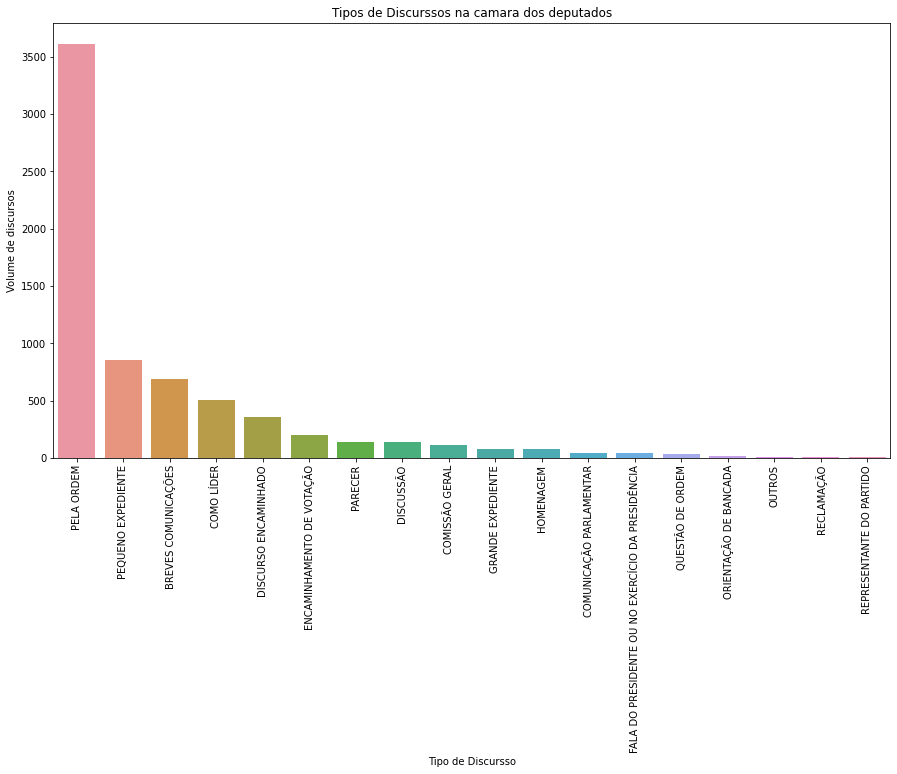

In [6]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.countplot(data=df,x='tipoDiscurso',order=df.tipoDiscurso.value_counts().index)
ax.set_title('Tipos de Discursos na camará dos deputados')
ax.set_ylabel('Volume de discursos')
ax.set_xlabel('Tipo de Discursso')
ax.tick_params(axis='x', rotation=90)

In [30]:
pc = (len(df[df["tipoDiscurso"]=='PELA ORDEM'])/len(df))*100
print('{:.2f}% dos discursos tem o tipo PELA ORDEM'.format(pc))

52.22% dos discursos tem o tipo PELA ORDEM


Até a data de extração desse dataset tivemos 52% dos discursos com ao tipo de pela ordem, claramente vim um volume extremamente superior aos outros tipos. 
o que no caso é descrito com "Uso da palavra em qualquer momento da sessão para intervenções não previstas. Pedido de permissão para uso da palavra para conhecer a orientação dos trabalhos." [pela camará dos deputados](https://www2.camara.leg.br/a-camara/estruturaadm/gestao-na-camara-dos-deputados/responsabilidade-social-e-ambiental/acessibilidade/glossarios/dicionario-de-libras/p/pela-ordem)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924 entries, 0 to 6923
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_deputado           6924 non-null   int64         
 1   dataHoraInicio        6924 non-null   datetime64[ns]
 2   tipoDiscurso          6920 non-null   object        
 3   keywords              6905 non-null   object        
 4   transcricao           6924 non-null   object        
 5   nome                  6924 non-null   object        
 6   siglaPartido          6924 non-null   object        
 7   alinhamento_pulitoco  6554 non-null   object        
 8   siglaUf               6924 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 487.0+ KB


In [9]:
df['keywords'] = df.keywords.str.split(",")

In [10]:
#não é bunito mais funiciona
counter = 0
df_words = pd.DataFrame(columns=['deputado','dataHoraInicio','keywords'])
df_words['dataHoraInicio'] = pd.to_datetime(df_words['dataHoraInicio'])
for index,row in df[~df['keywords'].isna()].iterrows() :
    deputado=row['nome']
    dataHoraInicio=row['dataHoraInicio']
    keywords = row['keywords']
    for keyword in keywords:
        df_words.loc[counter]=[deputado, dataHoraInicio,keyword]
        counter = counter+1

In [11]:
len(df[~df['keywords'].isna()])

6905

In [12]:
df_words

,deputado,dataHoraInicio,keywords
0,Carlos Chiodini,2019-04-04 15:12:00,MPV 868/2018
1,Carlos Chiodini,2019-04-04 15:12:00,MEDIDA PROVISORIA
2,Carlos Chiodini,2019-04-04 15:12:00,ALTERAÇÃO
3,Carlos Chiodini,2019-04-04 15:12:00,MARCO LEGAL DO SANEAMENTO BÁSICO.
4,Carlos Chiodini,2020-05-20 20:12:00,PL 2294/2020
...,...,...,...
65977,Odair Cunha,2019-06-25 20:12:00,COMISSÃO DE CONSTITUIÇÃO E JUSTIÇA E DE CIDAD...
65978,Odair Cunha,2019-06-25 20:12:00,PL 2788/2019
65979,Odair Cunha,2019-06-25 20:12:00,PROJETO DE LEI ORDINÁRIA
65980,Odair Cunha,2019-06-25 20:12:00,PARTIDO DOS TRABALHADORES (PT)


In [13]:
df_words.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65982 entries, 0 to 65981
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   deputado        65982 non-null  object        
 1   dataHoraInicio  65982 non-null  datetime64[ns]
 2   keywords        65982 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.0+ MB


In [14]:
df_words['dt_rounded']= df_words.dataHoraInicio.dt.round('D')
df_words['dt_rounded']=df_words.dt_rounded- pd.to_timedelta(df_words.dt_rounded.dt.day,unit='d')

In [15]:
df_words.head()

,deputado,dataHoraInicio,keywords,dt_rounded
0,Carlos Chiodini,2019-04-04 15:12:00,MPV 868/2018,2019-03-31
1,Carlos Chiodini,2019-04-04 15:12:00,MEDIDA PROVISORIA,2019-03-31
2,Carlos Chiodini,2019-04-04 15:12:00,ALTERAÇÃO,2019-03-31
3,Carlos Chiodini,2019-04-04 15:12:00,MARCO LEGAL DO SANEAMENTO BÁSICO.,2019-03-31
4,Carlos Chiodini,2020-05-20 20:12:00,PL 2294/2020,2020-04-30


In [16]:
df_time = df_words.groupby(by=['dt_rounded','keywords']).count().reset_index()

In [17]:
k_words=['ORIENTAÇÃO DE BANCADA',' PROJETO DE LEI ORDINÁRIA',
         'PROPOSTA DE EMENDA À CONSTITUIÇÃO','DEPUTADO FEDERAL','MEDIDA PROVISÓRIA','',
         ' ORIENTAÇÃO DE BANCADA',' PROPOSTA DE EMENDA À CONSTITUIÇÃO',
         ' DEPUTADO FEDERAL',' MEDIDA PROVISÓRIA','PROJETO DE LEI COMPLEMENTAR',
         ' PROJETO DE LEI COMPLEMENTAR','REQUERIMENTO DE DESTAQUE DE VOTAÇÃO EM SEPARADO',
        ' REQUERIMENTO DE DESTAQUE DE VOTAÇÃO EM SEPARADO']
df_out = pd.DataFrame()
for i in df_time.dt_rounded.unique():
    df_x = df_time[(df_time['dt_rounded']==i)]
    df_x = df_x[['dt_rounded','keywords','deputado']].sort_values(by='deputado',ascending=False)
    df_x = df_x[~df_x['keywords'].isin(k_words)]
    df_out=df_out.append(df_x.head(1))

In [18]:
df_out.head()

,dt_rounded,keywords,deputado
978,2019-01-31,CRÍTICA.,121
6146,2019-02-28,PL 2724/2015,116
9262,2019-03-31,REFORMA PREVIDENCIÁRIA (2019),116
10573,2019-04-30,CONTINGENCIAMENTO,95
13269,2019-05-31,MPV 875/2019,31


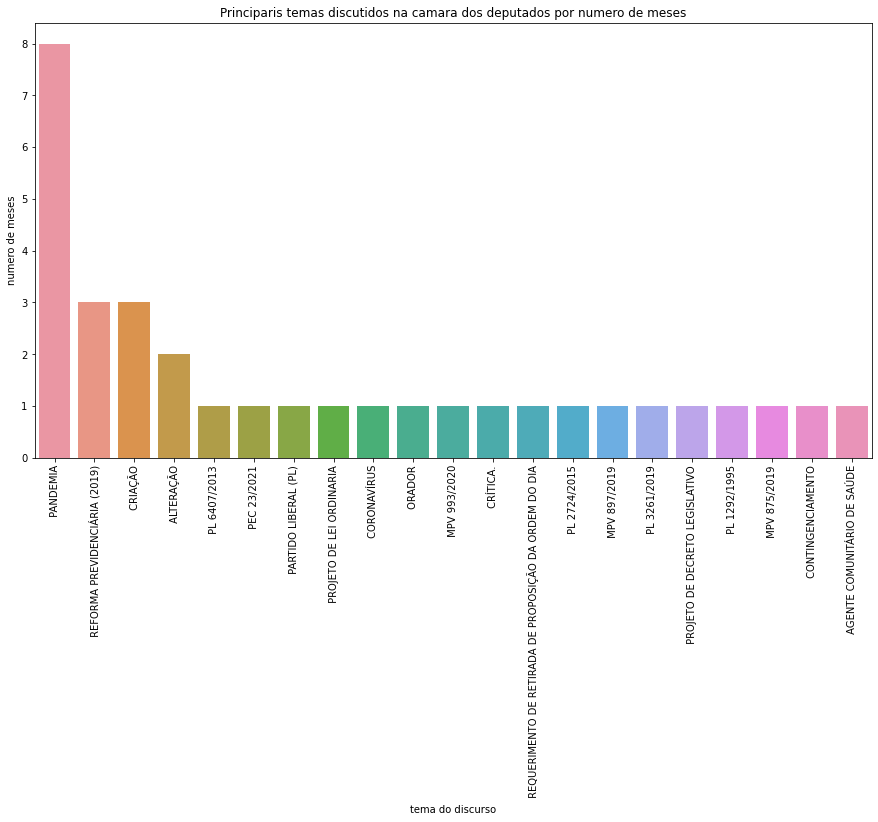

In [19]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.countplot(data=df_out,x='keywords',
                  order=df_out.keywords.value_counts().index)
ax.set_title('Principais temas discutidos na camará dos deputados por número de meses')
ax.set_ylabel('Numero de meses')
ax.set_xlabel('Tema do discurso')
ax.tick_params(axis='x', rotation=90)

In [20]:
df.head()

,id_deputado,dataHoraInicio,tipoDiscurso,keywords,transcricao,nome,siglaPartido,alinhamento_pulitoco,siglaUf
0,204361,2019-04-04 15:12:00,PELA ORDEM,"[MPV 868/2018, MEDIDA PROVISORIA, ALTERAÇÃO,...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
1,204361,2020-05-20 20:12:00,PELA ORDEM,"[PL 2294/2020, PROJETO DE LEI ORDINÁRIA, FLE...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
2,204361,2019-06-26 16:32:00,PELA ORDEM,"[IVAN NAATZ, DEPUTADO ESTADUAL, SANTA CATARI...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
3,204361,2020-05-21 19:16:00,DISCUSSÃO,"[DISCUSSÃO, PL 2294/2020, PROJETO DE LEI ORD...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Sem rev...,Carlos Chiodini,MDB,None,SC
4,178908,2019-02-13 18:28:00,PELA ORDEM,"[REFORMA PREVIDENCIÁRIA, FAVORÁVEL.]",O SR. DELEGADO ÉDER MAURO (Bloco/PSD - PA. Pel...,Delegado Éder Mauro,PSD,direita,PA


Text(0.5, 0, 'Sigla do partido')

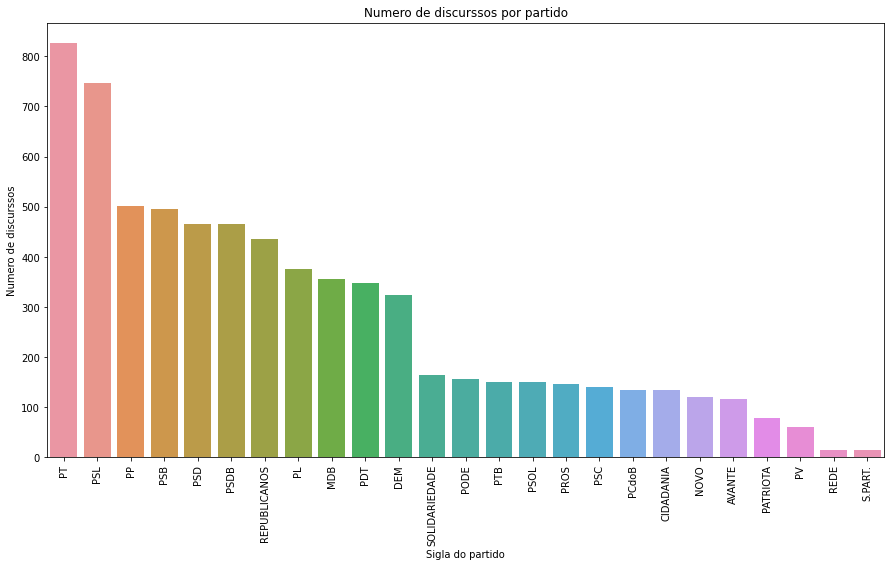

In [21]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.countplot(data=df, x = 'siglaPartido',order=df.siglaPartido.value_counts().index)
ax.set_title('Numero de discursos por partido')
ax.set_ylabel('Numero de discursos')
ax.set_xlabel('Sigla do partido')

Aqui vemos um senário parecido que vimos na [analise de cenário da camará de deputados](https://github.com/adanielrangel/project_sume/blob/main/analises/analise_cenario_camara_de_daputados.ipynb) porem com algumas mudanças interessantes. 
vemos o pl que é o terceiro partido em volume de deputados utilizando muito menos que os outros partidos do mesmo tamanho, mas com essa exceção o volume de uso do púlpito é proporcional ao volume de deputados do partido. isso é mais estranho quando lembramos que o pl é o partido em que o presidente se elegeu. 

In [22]:
df.siglaPartido.unique()

array(['MDB', 'PSD', 'CIDADANIA', 'PDT', 'PL', 'PT', 'PODE', 'PSL', 'PSB',
       'PSOL', 'PROS', 'REPUBLICANOS', 'PCdoB', 'DEM', 'PP', 'PSDB',
       'SOLIDARIEDADE', 'PATRIOTA', 'NOVO', 'PTB', 'AVANTE', 'PSC', 'PV',
       'REDE', 'S.PART.'], dtype=object)

In [23]:
df.head()

,id_deputado,dataHoraInicio,tipoDiscurso,keywords,transcricao,nome,siglaPartido,alinhamento_pulitoco,siglaUf
0,204361,2019-04-04 15:12:00,PELA ORDEM,"[MPV 868/2018, MEDIDA PROVISORIA, ALTERAÇÃO,...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
1,204361,2020-05-20 20:12:00,PELA ORDEM,"[PL 2294/2020, PROJETO DE LEI ORDINÁRIA, FLE...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
2,204361,2019-06-26 16:32:00,PELA ORDEM,"[IVAN NAATZ, DEPUTADO ESTADUAL, SANTA CATARI...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Pela or...,Carlos Chiodini,MDB,None,SC
3,204361,2020-05-21 19:16:00,DISCUSSÃO,"[DISCUSSÃO, PL 2294/2020, PROJETO DE LEI ORD...",O SR. CARLOS CHIODINI (Bloco/MDB - SC. Sem rev...,Carlos Chiodini,MDB,None,SC
4,178908,2019-02-13 18:28:00,PELA ORDEM,"[REFORMA PREVIDENCIÁRIA, FAVORÁVEL.]",O SR. DELEGADO ÉDER MAURO (Bloco/PSD - PA. Pel...,Delegado Éder Mauro,PSD,direita,PA


In [24]:
df_top_partido = pd.DataFrame()
for partido in df.siglaPartido.unique():
    df_partido = df[df['siglaPartido']==partido].nome.value_counts(normalize=True).sort_values(ascending=False).reset_index()
    df_partido['siglaPartido'] = partido
    df_top_partido = df_top_partido.append(df_partido.head(n=1))

Text(0.5, 0, 'sigla do partido')

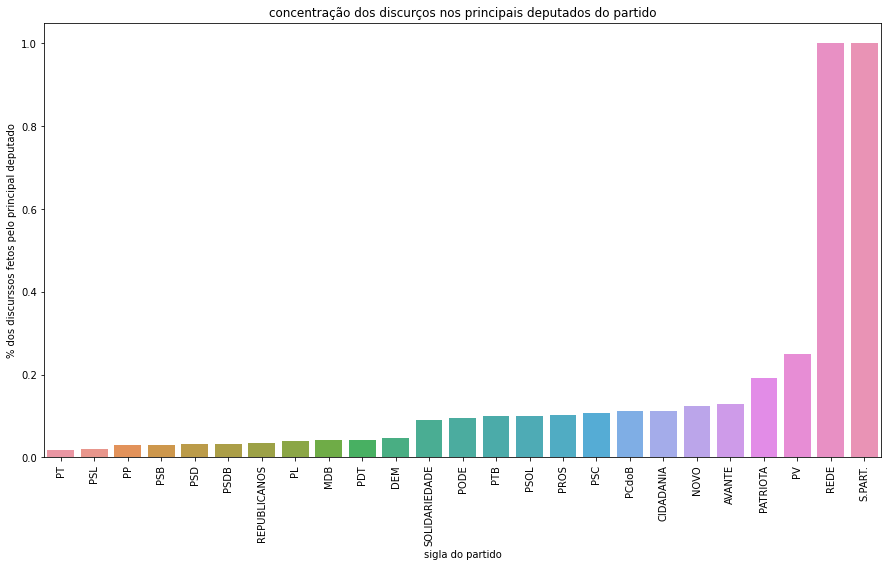

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.barplot(data = df_top_partido, x='siglaPartido',y='nome',
            order=df_top_partido.sort_values(by='nome').siglaPartido
           )
ax.set_title('Concentração dos discursos nos principais deputados do partido')
ax.set_ylabel('% dos discursos fetos pelo principal deputado')
ax.set_xlabel('Sigla do partido')

Aqui vemos algo que é interessante. 
Provavelmente exite uma cota de discursos por deputado, e quanto menor o partido, mais concentrado o 'poder' de uso do púlpito. 

In [27]:
df_top_partido.sort_values('nome')

,index,nome,siglaPartido
0,Margarida Salomão,0.018160,PT
0,Vitor Hugo,0.020080,PSL
0,Franco Cartafina,0.029880,PP
0,Rosana Valle,0.030242,PSB
0,Delegado Éder Mauro,0.032189,PSD
0,Vitor Lippi,0.032258,PSDB
0,Márcio Marinho,0.034404,REPUBLICANOS
0,Fernando Rodolfo,0.039894,PL
0,Vinicius Farah,0.042254,MDB
0,Afonso Motta,0.043103,PDT


Aqui vemos essa aglomeração por tamanho de partido e vemos qual deputado é o que mais controla o volume de discursos.
Temos dois destaques importantes. <br>
Rodrigo maia - sem partido:<br>
Provavelmente ele fez esse discurso no começo do mandato, durante a troca de mandatos, tendo em vista que ele era presidente da camará dos deputados no mandato anterior. <br>
Joenia wapichana - Rede:<br>
Rede é um dos menores partidos em volume de deputados, provavelmente por isso ele concentra 100% dos discursos desse partido.
Com exerção desses casos vemos que o restante dos partidos não possui um domínio tão forte de um deputado, e esse percentual é inversamente proporcional ao tamanho do partido. ou seja quanto maior o partido menor a representatividade do principal deputado. 

## conclusão

nesse estudo entendemos que existe uma proporcionalidade entre o tamanho do partido e o número de discursos, isso aponta para um número limite de discursos por deputados. 
além disso, nessa legislatura vemos uma preferência por temas sobre a pandemia de covid-19 e usu do tipo de discurso pela ordem.